In [1]:
import pyforest

# data processing library
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# machine learning library
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier 

#evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


## Visulization 

In [2]:
sns.set(rc={'figure.figsize':(14,6)})
sns.set_style('whitegrid')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Reading the Data 

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

<IPython.core.display.Javascript object>

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis 

In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## Dependent Variable Analysis

In [7]:
df['Class'].unique()

array([0, 1], dtype=int64)

<IPython.core.display.Javascript object>

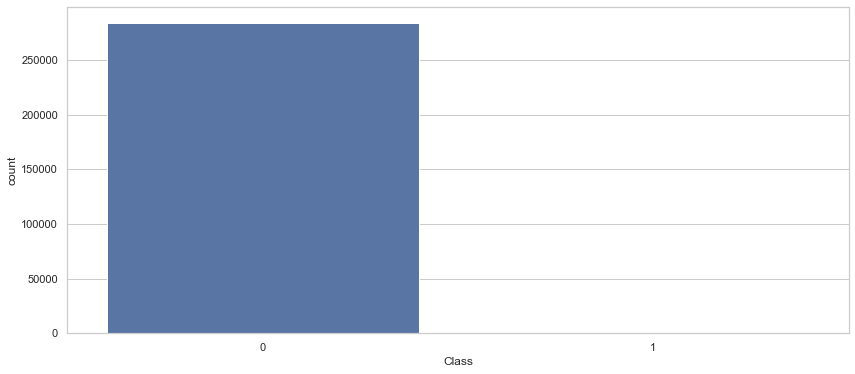

In [8]:
sns.countplot(df['Class'])

In [9]:
fraud_transc = df[df['Class']==1]
normal_tranc = df[df['Class']==0]
total = df['Class']

In [10]:
print('no of fraud tranc',len(fraud_transc))
print('no of normal tranc',len(normal_tranc))

no of fraud tranc 492
no of normal tranc 284315


In [11]:
fraud_count = len(fraud_transc)
non_fraud_count = len(normal_tranc)

In [12]:
len(fraud_transc) + len(normal_tranc)

284807

### Fraud Percentage

In [13]:
fraud_percentage = ((fraud_count/non_fraud_count*100))

In [14]:
fraud_percentage

0.17304750013189596

In [15]:
print(f'so total noumber of fraud case are {fraud_count} \n  total noumber of non fraud cases are {non_fraud_count}\n  percentage of fraud is {fraud_percentage}%')

so total noumber of fraud case are 492 
  total noumber of non fraud cases are 284315
  percentage of fraud is 0.17304750013189596%


### Amount column Analysis

In [16]:
fraud_transc['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
normal_tranc['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

while seeing the the above statistics we can see that amount column is changing enormously when compared to the rest of the variables.so we need to standardized the amount column using the ‘StandardScaler’ method in python  

### Standard Scaler 

In [18]:
df['Amount'].head()

0    149.62
1      2.69
2    378.66
3    123.50
4     69.99
Name: Amount, dtype: float64

In [19]:
sc = StandardScaler()

In [20]:
amount = df['Amount'].values

In [21]:
amount

array([149.62,   2.69, 378.66, ...,  67.88,  10.  , 217.  ])

In [22]:
df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

In [23]:
df['Amount'].head()

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
Name: Amount, dtype: float64

### Now The Data is ready to split

In [24]:
x = df.drop('Class', axis=1)
y = df['Class']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Split Details 

In [26]:
print(f'length of x_train ->{len(x_train)}, length of y_train ->{len(y_train)} \n length of x_test ->{len(x_test)}, length of y_test->{len(y_test)} ')

length of x_train ->227845, length of y_train ->227845 
 length of x_test ->56962, length of y_test->56962 


### Now our data is split into train and test set and is ready for model

#### Logistic Regression

In [27]:
logr = LogisticRegression()
logr.fit(x_train, y_train)
logr_pred = logr.predict(x_test)

C:\Users\utkar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Decision Tree

In [28]:
tree = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)

#### Random Forest Classifier

In [29]:
ran_forest = RandomForestClassifier(max_depth = 4)
ran_forest.fit(x_train, y_train)
ran_forest_pred = ran_forest.predict(x_test)

#### Support Vector Classifier

In [30]:
svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)

#### KNN

In [31]:
n = 5
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

#### X G Boost

In [32]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

C:\Users\utkar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:09:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Evaluation 

### Accuracy score

**Accuracy score = No.of correct predictions / Total no.of predictions**

In [33]:
print(f'Accuaracy score of logistic regression model -->{accuracy_score(y_test, logr_pred)}')
print(f'Accuaracy score of Descision tree model -->{accuracy_score(y_test, tree_pred)}')
print(f'Accuaracy score of Random Forest Classifier model -->{accuracy_score(y_test, ran_forest_pred)}')
print(f'Accuaracy score of Support Vector Classifier model -->{accuracy_score(y_test, svc_pred)}')
print(f'Accuaracy score of KNeighborsClassifier model -->{accuracy_score(y_test, knn_pred)}')
print(f'Accuaracy score of XGBClassifier model -->{accuracy_score(y_test,  xgb_pred)}')

Accuaracy score of logistic regression model -->0.9990695551420246
Accuaracy score of Descision tree model -->0.9993679997191109
Accuaracy score of Random Forest Classifier model -->0.9992977774656788
Accuaracy score of Support Vector Classifier model -->0.9982268881008391
Accuaracy score of KNeighborsClassifier model -->0.9983848881710614
Accuaracy score of XGBClassifier model -->0.9995084442259752


- So we can see Decision tree has maximum accuracy rate

### Confusion Matrix

In [34]:
print(f'Confusion Matrix of logistic regression model -->\n{confusion_matrix(y_test, logr_pred)}')
print(f'Confusion Matrix of Descision tree model -->\n{confusion_matrix(y_test, tree_pred)}')
print(f'Confusion Matrix of Random Forest Classifier model -->\n{confusion_matrix(y_test, ran_forest_pred)}')
print(f'Confusion Matrix of Support Vector Classifier model -->\n{confusion_matrix(y_test, svc_pred)}')
print(f'Confusion Matrix of KNeighborsClassifier model -->\n{confusion_matrix(y_test, knn_pred)}')
print(f'Confusion Matrix of XGBClassifier model -->\n{confusion_matrix(y_test,  xgb_pred)}')

Confusion Matrix of logistic regression model -->
[[56831    30]
 [   23    78]]
Confusion Matrix of Descision tree model -->
[[56849    12]
 [   24    77]]
Confusion Matrix of Random Forest Classifier model -->
[[56854     7]
 [   33    68]]
Confusion Matrix of Support Vector Classifier model -->
[[56861     0]
 [  101     0]]
Confusion Matrix of KNeighborsClassifier model -->
[[56861     0]
 [   92     9]]
Confusion Matrix of XGBClassifier model -->
[[56854     7]
 [   21    80]]


### F1 Score

**F1 score = 2( (precision * recall) / (precision + recall) )**

In [35]:
print(f'  F1 score of logistic regression model -->{f1_score(y_test, logr_pred)}')
print(f'  F1 score of Descision tree model -->{f1_score(y_test, tree_pred)}')
print(f'  F1 score of Random Forest Classifier model -->{f1_score(y_test, ran_forest_pred)}')
print(f'  F1 score of KNeighborsClassifier model -->{f1_score(y_test, knn_pred)}')
print(f'  F1 score of XGBClassifier model -->{f1_score(y_test,  xgb_pred)}')

  F1 score of logistic regression model -->0.7464114832535885
  F1 score of Descision tree model -->0.8105263157894738
  F1 score of Random Forest Classifier model -->0.7727272727272727
  F1 score of KNeighborsClassifier model -->0.1636363636363636
  F1 score of XGBClassifier model -->0.851063829787234
